In [2]:
# Our primary dataset can be found at:
# https://www.kaggle.com/datasets/asaniczka/tmdb-movies-dataset-2023-930k-movies
# The file is over 500MB - too big for github!

In [1]:
# import dependencies
import pandas as pd
import requests
import os
from dotenv import load_dotenv
import json
import subprocess
import warnings
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
tmdb_df = pd.read_csv("~/.kaggle/TMDB_movie_dataset_v11.csv")

In [3]:
tmdb_df = tmdb_df[['vote_average',
                        'vote_count',
                        'release_date',
                        'revenue',
                        'runtime',
                        'budget',
                        'imdb_id',
                        'overview',
                        'popularity',
                        'tagline',
                        'genres',
                        'production_companies',
                        'spoken_languages',
                        'keywords']]

In [4]:
tmdb_df.head(5)

,vote_average,vote_count,release_date,revenue,runtime,budget,imdb_id,overview,popularity,tagline,genres,production_companies,spoken_languages,keywords
0,8.364,34495,2010-07-15,825532764,148,160000000,tt1375666,"Cobb, a skilled thief who commits corporate es...",83.952,Your mind is the scene of the crime.,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","English, French, Japanese, Swahili","rescue, mission, dream, airplane, paris, franc..."
1,8.417,32571,2014-11-05,701729206,169,165000000,tt0816692,The adventures of a group of explorers who mak...,140.241,Mankind was born on Earth. It was never meant ...,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...",English,"rescue, future, spacecraft, race against time,..."
2,8.512,30619,2008-07-16,1004558444,152,185000000,tt0468569,Batman raises the stakes in his war on crime. ...,130.643,Welcome to a world without rules.,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","English, Mandarin","joker, sadism, chaos, secret identity, crime f..."
3,7.573,29815,2009-12-15,2923706026,162,237000000,tt0499549,"In the 22nd century, a paraplegic Marine is di...",79.932,Enter the world of Pandora.,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","English, Spanish","future, society, culture clash, space travel, ..."
4,7.710,29166,2012-04-25,1518815515,143,220000000,tt0848228,When an unexpected enemy emerges and threatens...,98.082,Some assembly required.,"Science Fiction, Action, Adventure",Marvel Studios,"English, Hindi, Russian","new york city, superhero, shield, based on com..."


In [6]:
tmdb_df.dtypes

vote_average            float64
vote_count                int64
release_date             object
revenue                   int64
runtime                   int64
budget                    int64
imdb_id                  object
overview                 object
popularity              float64
tagline                  object
genres                   object
production_companies     object
spoken_languages         object
keywords                 object
dtype: object

In [7]:
df = tmdb_df.copy()

In [8]:
# Convert object columns to appropriate types
with warnings.catch_warnings():
    warnings.simplefilter("ignore")

    for col in df.select_dtypes(include=['object']).columns:
        try:
            df[col] = pd.to_numeric(df[col])
        except ValueError:
            try:
                df[col] = pd.to_datetime(df[col])
            except ValueError:
                df[col] = df[col].astype('string')

In [9]:
df.dtypes

vote_average                   float64
vote_count                       int64
release_date            datetime64[ns]
revenue                          int64
runtime                          int64
budget                           int64
imdb_id                 string[python]
overview                string[python]
popularity                     float64
tagline                 string[python]
genres                  string[python]
production_companies    string[python]
spoken_languages        string[python]
keywords                string[python]
dtype: object

In [10]:
df['year'] = df['release_date'].dt.year
df['year'] = df['year'].fillna(-1).astype(int)

In [11]:
df.dtypes

vote_average                   float64
vote_count                       int64
release_date            datetime64[ns]
revenue                          int64
runtime                          int64
budget                           int64
imdb_id                 string[python]
overview                string[python]
popularity                     float64
tagline                 string[python]
genres                  string[python]
production_companies    string[python]
spoken_languages        string[python]
keywords                string[python]
year                             int64
dtype: object

In [12]:
df2 = df.copy()

In [13]:
df2 = df2[df2['revenue'].notna() & (df2['revenue'] != 0)]
df2 = df2[df2['budget'].notna() & (df2['budget'] != 0)]
df2 = df2[df2['vote_average'].notna() & (df2['vote_average'] != 0)]
df2 = df2[df2['vote_count'].notna() & (df2['vote_count'] != 0)]

In [14]:
df2['revenue'].value_counts()

revenue
100          126
1            121
10000         68
100000        61
1000000       58
            ... 
177311151      1
38934048       1
25900000       1
101564935      1
8544           1
Name: count, Length: 8600, dtype: int64

In [15]:

# sorted_df = sorted_df[(sorted_df['release_date'] >= '2014-01-01') & (sorted_df['release_date'] <= '2024-12-12')]

df2['roi'] = round(df2['revenue'] / df2['budget'], 2)
df2.head(5)

,vote_average,vote_count,release_date,revenue,runtime,budget,imdb_id,overview,popularity,tagline,genres,production_companies,spoken_languages,keywords,year,roi
0,8.364,34495,2010-07-15,825532764,148,160000000,tt1375666,"Cobb, a skilled thief who commits corporate es...",83.952,Your mind is the scene of the crime.,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","English, French, Japanese, Swahili","rescue, mission, dream, airplane, paris, franc...",2010,5.16
1,8.417,32571,2014-11-05,701729206,169,165000000,tt0816692,The adventures of a group of explorers who mak...,140.241,Mankind was born on Earth. It was never meant ...,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...",English,"rescue, future, spacecraft, race against time,...",2014,4.25
2,8.512,30619,2008-07-16,1004558444,152,185000000,tt0468569,Batman raises the stakes in his war on crime. ...,130.643,Welcome to a world without rules.,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","English, Mandarin","joker, sadism, chaos, secret identity, crime f...",2008,5.43
3,7.573,29815,2009-12-15,2923706026,162,237000000,tt0499549,"In the 22nd century, a paraplegic Marine is di...",79.932,Enter the world of Pandora.,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","English, Spanish","future, society, culture clash, space travel, ...",2009,12.34
4,7.710,29166,2012-04-25,1518815515,143,220000000,tt0848228,When an unexpected enemy emerges and threatens...,98.082,Some assembly required.,"Science Fiction, Action, Adventure",Marvel Studios,"English, Hindi, Russian","new york city, superhero, shield, based on com...",2012,6.90


In [16]:
print(df2['vote_average'].min())
print(df2['vote_average'].max())
print(df2['vote_count'].min())
print(df2['vote_count'].max())
df2.count()

0.8
10.0
1
34495


vote_average            10910
vote_count              10910
release_date            10690
revenue                 10910
runtime                 10910
budget                  10910
imdb_id                 10122
overview                10559
popularity              10910
tagline                  8423
genres                  10693
production_companies    10147
spoken_languages        10443
keywords                 9463
year                    10910
roi                     10910
dtype: int64

In [17]:
#Bayesian average is a statistical method used to estimate the true rating of a movie, 
#taking into account both the average rating and the number of votes. 
#It helps mitigate the impact of outliers and provides a more reliable estimate.

# Bayesian Average = (vote_count * vote_average + min_count * mean) / (vote_count + min_count)
# v is the number of votes for the movie
# R is the average rating of the movie   
# m is the minimum votes required to be listed in the chart
# C is the mean vote across the whole dataset

C = df2['vote_average'].mean()
m = df2['vote_count'].quantile(0.75)


def weighted_rating(x):
    # Add a small epsilon to prevent division by zero
    epsilon = 1e-10
    v = x['vote_count']
    R = x['vote_average']
    
    # Compute the weighted rating safely
    denominator = v + m + epsilon
    return (v / denominator * R) + (m / denominator * C)

df2.loc[:, 'weighted_rating'] = df2.apply(weighted_rating, axis=1)

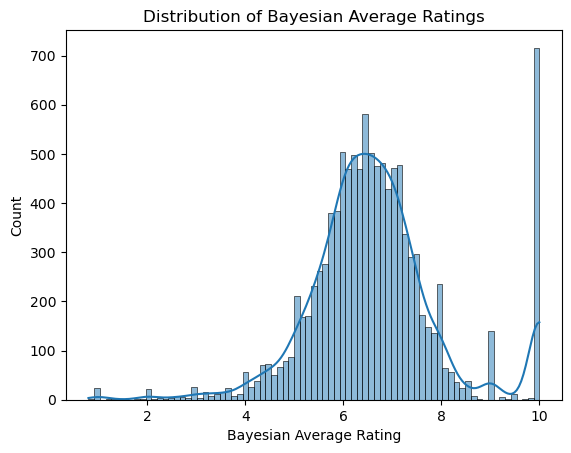

In [18]:
# Visualize the distribution of Bayesian average ratings
sns.histplot(df2['vote_average'], kde=True)
plt.title('Distribution of Bayesian Average Ratings')
plt.xlabel('Bayesian Average Rating')
plt.ylabel('Count')
plt.show()

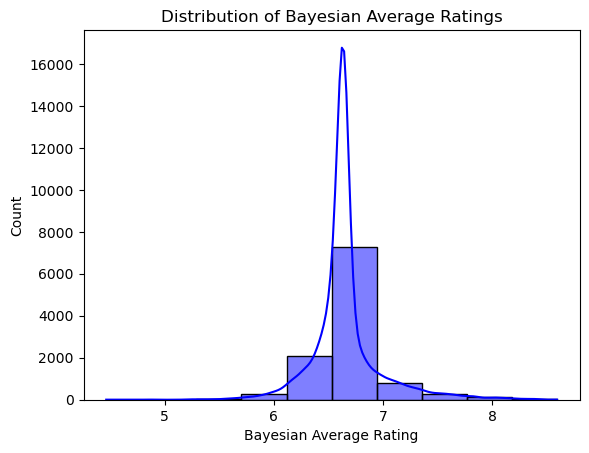

In [89]:
# Visualize the distribution of Bayesian average ratings
sns.histplot(df2['weighted_rating'], kde=True, bins=10, color='blue', edgecolor='black')
plt.title('Distribution of Bayesian Average Ratings')
plt.xlabel('Bayesian Average Rating')
plt.ylabel('Count')
plt.show()



In [ ]:
# Create a subplot with two histograms
plt.subplot(1, 2, 1)  # (rows, columns, position)
sns.histplot(df2['weighted_rating'], kde=True, color='blue', edgecolor='black')
plt.title('Distribution of Bayesian Average Ratings')
plt.xlabel('Bayesian Average Rating')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.histplot(df2['roi'], kde=True, color='orange', edgecolor='black')
plt.title('Distribution of ROI')
plt.xlabel('ROI')
plt.ylabel('Count')

plt.show()

In [83]:
import requests

def get_movie_name(imdb_id):
    # Base URL for the OMDb API
    base_url = "http://www.omdbapi.com/"
    api_key = "c1d0cce2"
    
    # Parameters for the API call
    params = {
        'i': imdb_id,  # IMDb ID
        'apikey': api_key  # Your API Key
    }
    
    # Make the GET request
    response = requests.get(base_url, params=params)
    
    # Check if the request was successful
    if response.status_code == 200:
        data = response.json()  # Parse JSON response
        if data.get("Response") == "True":
            return data.get("Title")  # Return the movie name
        else:
            return f"Error: {data.get('Error')}"  # Return error message from API
    else:
        return f"HTTP Error: {response.status_code}"



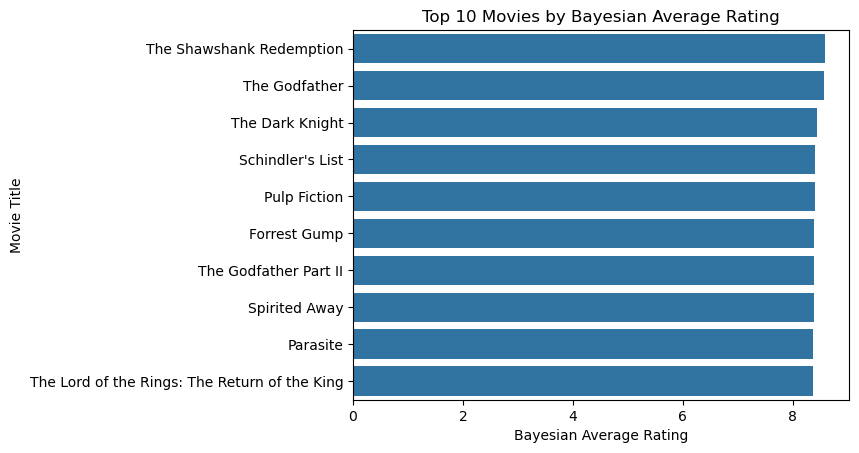

In [84]:
# Plot top 10 movies by Bayesian average
top_10 = df2.sort_values('weighted_rating', ascending=False).head(10)
top_10['movie_name'] = top_10['imdb_id'].apply(lambda x: get_movie_name(x))
top_10.reset_index().head(20)
sns.barplot(x='weighted_rating', y='movie_name', data=top_10)
plt.title('Top 10 Movies by Bayesian Average Rating')
plt.xlabel('Bayesian Average Rating')
plt.ylabel('Movie Title')
plt.show()